Team Name: DataLuck

Participants: Naveen Arora / Disha Shetty 

Language Used: Python

Hardware and Software requirements: Google Colab

Aim and objective: Exploratory data analysis. We have seen how price is affected by the variables provided in the data set. We have also checked how the elements are correlated with each other.

Future Scope of your work: The prediction of the prices can be made by using ML alogithms such as Linear and Logistic Regression or RandomForest.

In [ ]:
#Read Dataset
dataset= pd.read_csv("Data Analysis Challenge Data Set.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataset.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
dataset.describe(include= "all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,3.62,3.4,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,NaN,NaN,NaN,NaN,148,159,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,53.724878,2555.565854,NaN,NaN,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,2.443522,520.680204,NaN,NaN,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,NaN,NaN,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [ ]:
# Removing the four "?" values entered in the column Price
dataset.drop(dataset[ dataset['price'] == '?' ].index, inplace = True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [ ]:
dataset['bore'].unique()

array(['3.47', '2.68', '3.19', '3.13', '3.5', '3.31', '3.62', '2.91',
       '3.03', '2.97', '3.34', '3.6', '2.92', '3.15', '3.43', '3.63',
       '3.54', '3.08', '?', '3.39', '3.76', '3.58', '3.46', '3.8', '3.78',
       '3.17', '3.35', '3.59', '2.99', '3.33', '3.7', '3.61', '3.94',
       '3.74', '2.54', '3.05', '3.27', '3.24', '3.01'], dtype=object)

In [ ]:
dataset.loc[dataset['bore'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,?,?,9.4,101,6000,17,23,10945
56,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,?,?,9.4,101,6000,17,23,11845
57,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,two,70,4bbl,?,?,9.4,101,6000,17,23,13645
58,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,two,80,mpfi,?,?,9.4,135,6000,16,23,15645


In [ ]:
# Replacing the '?' values with nan
dataset['bore'] = dataset['bore'].replace('?', np.nan)
dataset['stroke'] = dataset['stroke'].replace('?', np.nan)

In [ ]:
dataset['stroke'].unique()

array(['2.68', '3.47', '3.4', '2.8', '3.19', '3.39', '3.03', '3.11',
       '3.23', '3.46', '3.9', '3.41', '3.07', '3.58', '4.17', '2.76',
       '3.15', nan, '3.16', '3.64', '3.1', '3.35', '3.12', '3.86', '3.29',
       '3.27', '3.52', '2.19', '3.21', '2.9', '2.07', '2.36', '2.64',
       '3.08', '3.5', '3.54', '2.87'], dtype=object)

In [ ]:
dataset['horsepower'].unique()

array(['111', '154', '102', '115', '110', '140', '101', '121', '182',
       '48', '70', '68', '88', '145', '58', '76', '60', '86', '100', '78',
       '90', '176', '262', '135', '84', '64', '120', '72', '123', '155',
       '184', '175', '116', '69', '55', '97', '152', '160', '200', '95',
       '142', '143', '207', '?', '73', '82', '94', '62', '56', '112',
       '92', '161', '156', '52', '85', '114', '162', '134', '106'],
      dtype=object)

In [ ]:
dataset.loc[dataset['horsepower'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,?,renault,gas,std,four,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,four,132,mpfi,3.46,3.9,8.7,?,?,23,31,9295
131,2,?,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,four,132,mpfi,3.46,3.9,8.7,?,?,23,31,9895


In [ ]:
dataset.loc[dataset['peak-rpm'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,?,renault,gas,std,four,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,four,132,mpfi,3.46,3.9,8.7,?,?,23,31,9295
131,2,?,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,four,132,mpfi,3.46,3.9,8.7,?,?,23,31,9895


In [ ]:
# Replacing the '?' values with nan
dataset['horsepower'] = dataset['horsepower'].replace('?', np.nan)
dataset['peak-rpm'] = dataset['peak-rpm'].replace('?', np.nan)

In [ ]:
# Change the data type to float
dataset['bore']       = dataset['bore'].astype('float')
dataset['stroke']     = dataset['stroke'].astype('float')
dataset['horsepower'] = dataset['horsepower'].astype('float')
dataset['peak-rpm']   = dataset['peak-rpm'].astype('float')
dataset['price']      = dataset['price'].astype('float')

In [ ]:
# Imputing the nan values in the columns with mean values
dataset['bore'].fillna(value=dataset['bore'].mean(), inplace=True)
dataset['stroke'].fillna(value=dataset['stroke'].mean(), inplace=True)
dataset['horsepower'].fillna(value=dataset['horsepower'].mean(), inplace=True)
dataset['peak-rpm'].fillna(value=dataset['peak-rpm'].mean(), inplace=True)

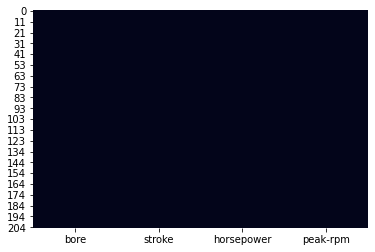

In [ ]:
# Checking for any left out null values
sns.heatmap(dataset[['bore', 'stroke', 'horsepower', 'peak-rpm']].isnull(), cbar=False)

In [ ]:
# Replacing the '?' values with nan for the normalized-losses
dataset['normalized-losses'] = dataset['normalized-losses'].replace('?', np.nan)

In [ ]:
# Change the data type to float
dataset['normalized-losses'] = dataset['normalized-losses'].astype('float')

In [ ]:
dataset['normalized-losses'].isna().sum()

37

In [ ]:
dataset['num-of-doors'].value_counts()

four    113
two      86
?         2
Name: num-of-doors, dtype: int64

In [ ]:
dataset[dataset['num-of-doors']=='?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148.0,dodge,gas,turbo,?,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,NaN,mazda,diesel,std,?,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,four,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


In [ ]:
dataset[dataset['make'] == 'dodge']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
21,1,118.0,dodge,gas,std,two,hatchback,fwd,front,93.7,157.3,63.8,50.8,1876,ohc,four,90,2bbl,2.97,3.23,9.41,68.0,5500.0,37,41,5572.0
22,1,118.0,dodge,gas,std,two,hatchback,fwd,front,93.7,157.3,63.8,50.8,1876,ohc,four,90,2bbl,2.97,3.23,9.40,68.0,5500.0,31,38,6377.0
23,1,118.0,dodge,gas,turbo,two,hatchback,fwd,front,93.7,157.3,63.8,50.8,2128,ohc,four,98,mpfi,3.03,3.39,7.60,102.0,5500.0,24,30,7957.0
24,1,148.0,dodge,gas,std,four,hatchback,fwd,front,93.7,157.3,63.8,50.6,1967,ohc,four,90,2bbl,2.97,3.23,9.40,68.0,5500.0,31,38,6229.0
25,1,148.0,dodge,gas,std,four,sedan,fwd,front,93.7,157.3,63.8,50.6,1989,ohc,four,90,2bbl,2.97,3.23,9.40,68.0,5500.0,31,38,6692.0
26,1,148.0,dodge,gas,std,four,sedan,fwd,front,93.7,157.3,63.8,50.6,1989,ohc,four,90,2bbl,2.97,3.23,9.40,68.0,5500.0,31,38,7609.0
27,1,148.0,dodge,gas,turbo,?,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,3.03,3.39,7.60,102.0,5500.0,24,30,8558.0
28,-1,110.0,dodge,gas,std,four,wagon,fwd,front,103.3,174.6,64.6,59.8,2535,ohc,four,122,2bbl,3.34,3.46,8.50,88.0,5000.0,24,30,8921.0
29,3,145.0,dodge,gas,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2811,ohc,four,156,mfi,3.60,3.90,7.00,145.0,5000.0,19,24,12964.0


In [ ]:
# Replacing the "?" value with "two" as all the sedans in the make dodge has two doors
dataset.loc[(dataset['num-of-doors'] == '?') & (dataset['body-style'] == 'sedan') & 
            (dataset['make'] == 'dodge'),'num-of-doors'] = 'four' 
dataset.loc[(dataset['num-of-doors'] == '?') & (dataset['body-style'] == 'sedan') & 
            (dataset['make'] == 'mazda'),'num-of-doors'] = 'two'

In [ ]:
dataset[dataset['make'] == 'mazda']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,two,four,?
50,1,104.0,mazda,gas,std,two,hatchback,fwd,front,93.1,159.1,64.2,54.1,1890,ohc,four,91,2bbl,3.030000,3.150000,9.0,68.0,5000.0,30,31,5195.0,NaN,NaN,NaN
51,1,104.0,mazda,gas,std,two,hatchback,fwd,front,93.1,159.1,64.2,54.1,1900,ohc,four,91,2bbl,3.030000,3.150000,9.0,68.0,5000.0,31,38,6095.0,NaN,NaN,NaN
52,1,104.0,mazda,gas,std,two,hatchback,fwd,front,93.1,159.1,64.2,54.1,1905,ohc,four,91,2bbl,3.030000,3.150000,9.0,68.0,5000.0,31,38,6795.0,NaN,NaN,NaN
53,1,113.0,mazda,gas,std,four,sedan,fwd,front,93.1,166.8,64.2,54.1,1945,ohc,four,91,2bbl,3.030000,3.150000,9.0,68.0,5000.0,31,38,6695.0,NaN,NaN,NaN
54,1,113.0,mazda,gas,std,four,sedan,fwd,front,93.1,166.8,64.2,54.1,1950,ohc,four,91,2bbl,3.080000,3.150000,9.0,68.0,5000.0,31,38,7395.0,NaN,NaN,NaN
55,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,3.330711,3.256904,9.4,101.0,6000.0,17,23,10945.0,NaN,NaN,NaN
56,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,3.330711,3.256904,9.4,101.0,6000.0,17,23,11845.0,NaN,NaN,NaN
57,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,two,70,4bbl,3.330711,3.256904,9.4,101.0,6000.0,17,23,13645.0,NaN,NaN,NaN
58,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,two,80,mpfi,3.330711,3.256904,9.4,135.0,6000.0,16,23,15645.0,NaN,NaN,NaN
59,1,129.0,mazda,gas,std,two,hatchback,fwd,front,98.8,177.8,66.5,53.7,2385,ohc,four,122,2bbl,3.390000,3.390000,8.6,84.0,4800.0,26,32,8845.0,NaN,NaN,NaN


In [ ]:
# Checking for duplicate rows, if any
dataset.duplicated().value_counts()

# No duplicate rows found in the dataset

False    201
dtype: int64

In [ ]:
# Since no visible correlation is observed for normalized-losses with any other column with continuous datatype, 
# we replace all the NaN values with the mean value
dataset['normalized-losses'].fillna(value=dataset['normalized-losses'].mean(), inplace=True)

In [ ]:
dataset.describe(include= "all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,two,four,?
count,201.000000,201.00000,201,201,201,201,201,201,201,201.000000,201.000000,201.000000,201.000000,201.000000,201,201,201.000000,201,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,2,2,2
unique,NaN,NaN,22,2,2,3,5,3,2,NaN,NaN,NaN,NaN,NaN,6,7,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,four,four,four
freq,NaN,NaN,32,181,165,113,94,118,198,NaN,NaN,NaN,NaN,NaN,145,157,NaN,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1
mean,0.840796,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.797015,174.200995,65.889055,53.766667,2555.666667,NaN,NaN,126.875622,NaN,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353,NaN,NaN,NaN
std,1.254802,31.99625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.066366,12.322175,2.101471,2.447822,517.296727,NaN,NaN,41.546834,NaN,0.268072,0.316048,4.004965,37.365602,478.113178,6.423220,6.815150,7947.066342,NaN,NaN,NaN
min,-2.000000,65.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,NaN,NaN,NaN
25%,0.000000,101.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.800000,64.100000,52.000000,2169.000000,NaN,NaN,98.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,NaN,NaN,NaN
50%,1.000000,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5117.587940,24.000000,30.000000,10295.000000,NaN,NaN,NaN
75%,2.000000,137.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.500000,66.600000,55.500000,2926.000000,NaN,NaN,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,NaN,NaN,NaN


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

**CATEGORICAL VARIABLE ANALYSIS**

In [ ]:
# Analyzing Column - Make
dataset['make'].nunique()

22

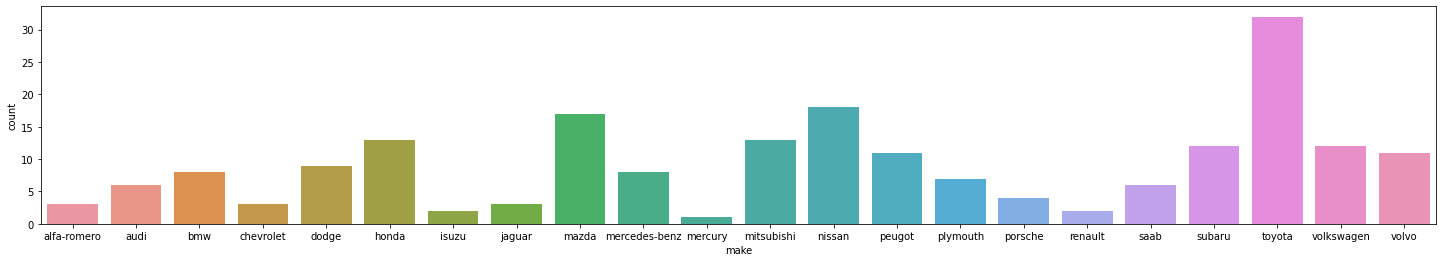

In [ ]:
fig_dims = (25, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x= 'make', data = dataset, ax = ax)

In [ ]:
dataset['make'].value_counts()

toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
subaru           12
volkswagen       12
peugot           11
volvo            11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
saab              6
audi              6
porsche           4
chevrolet         3
alfa-romero       3
jaguar            3
isuzu             2
renault           2
mercury           1
Name: make, dtype: int64

**Insight(s)** - The Dataset has 22 types of different Makes of cars. Toyota representing the highest, with 32 cars, and Mercury representing the least with a single car.

In [ ]:
# Analyzing Column - Fuel-type
dataset['fuel-type'].value_counts()

gas       181
diesel     20
Name: fuel-type, dtype: int64

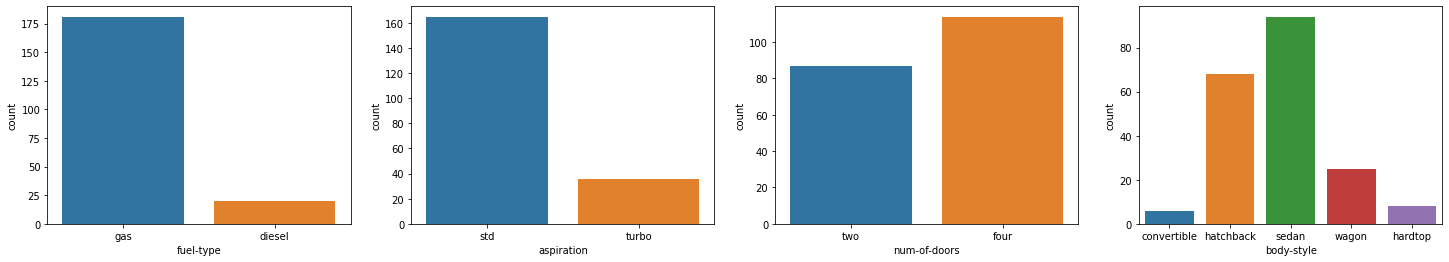

In [ ]:
fig_dims = (25, 4)
fig, ax =plt.subplots(1,4, figsize = fig_dims)
sns.countplot(x = 'fuel-type', data = dataset, ax=ax[0])
sns.countplot(x = 'aspiration', data = dataset, ax=ax[1])
sns.countplot(x = 'num-of-doors', data = dataset, ax=ax[2])
sns.countplot(x = 'body-style', data = dataset, ax=ax[3])

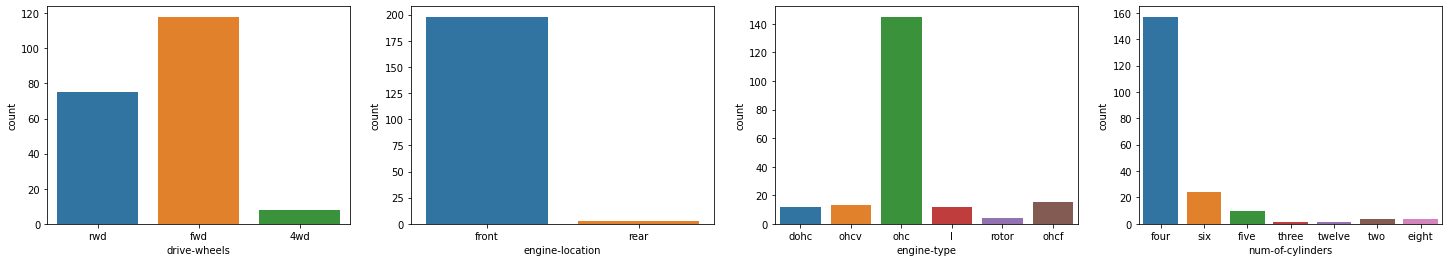

In [ ]:
fig_dims = (25, 4)
fig, ax =plt.subplots(1,4, figsize = fig_dims)
sns.countplot(x = 'drive-wheels', data = dataset, ax=ax[0])
sns.countplot(x = 'engine-location', data = dataset, ax=ax[1])
sns.countplot(x = 'engine-type', data = dataset, ax=ax[2])
sns.countplot(x = 'num-of-cylinders', data = dataset, ax=ax[3])

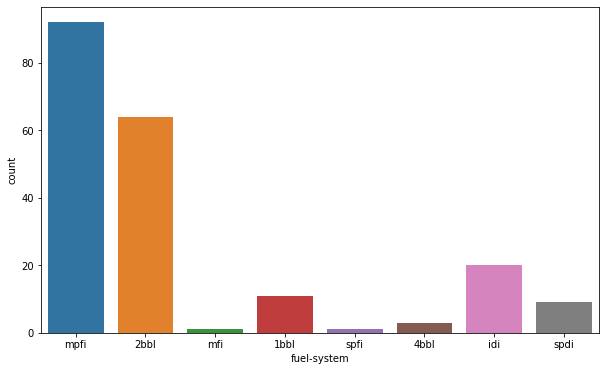

In [ ]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x = 'fuel-system', data = dataset, ax=ax)

Fuel System type 'mfi' are the least used in the vehicles
Most vehicles have 'Mpfi' Fuel System.

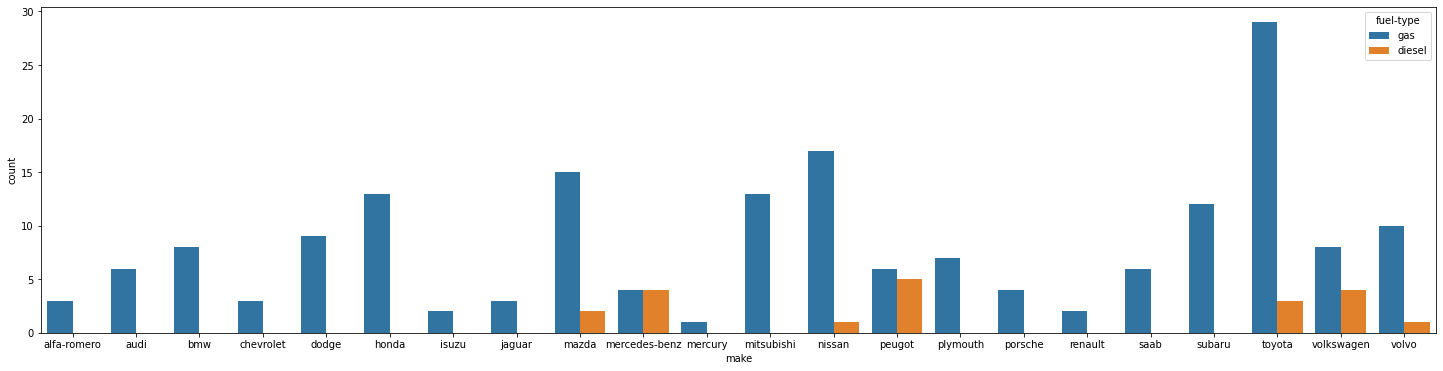

In [ ]:
fig_dims = (25, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x= 'make', data = dataset, ax = ax, hue = 'fuel-type')

**Insight(s)** - 

*   There are only two types of Fuel types available in the cars with maximum cars utilizinf the gas type (181) and only 20 cars utilizing the diesel type fuel. 
*   Only 7 brands out of the 22 in the dataset contain diesel fuel type with Peugot having the maximum of those.








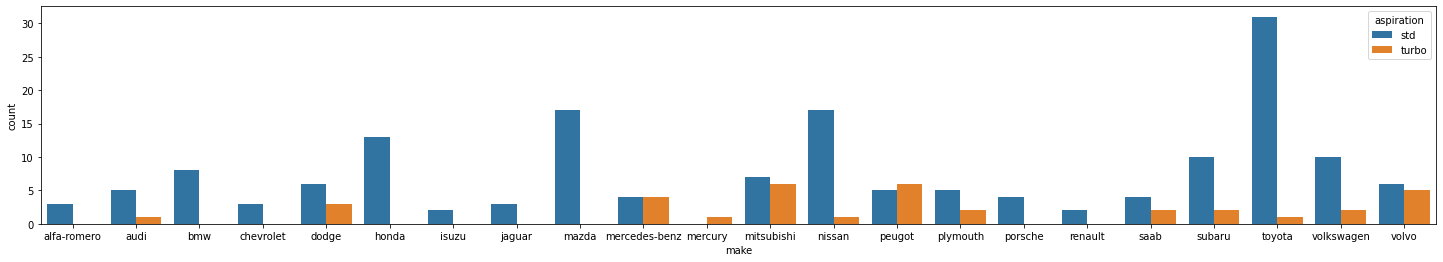

In [ ]:
fig_dims = (25, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x= 'make', data = dataset, ax = ax, hue = 'aspiration')

'Turbo' is used in 13 makes of cars.
Std engine is used in 21 makes of cars

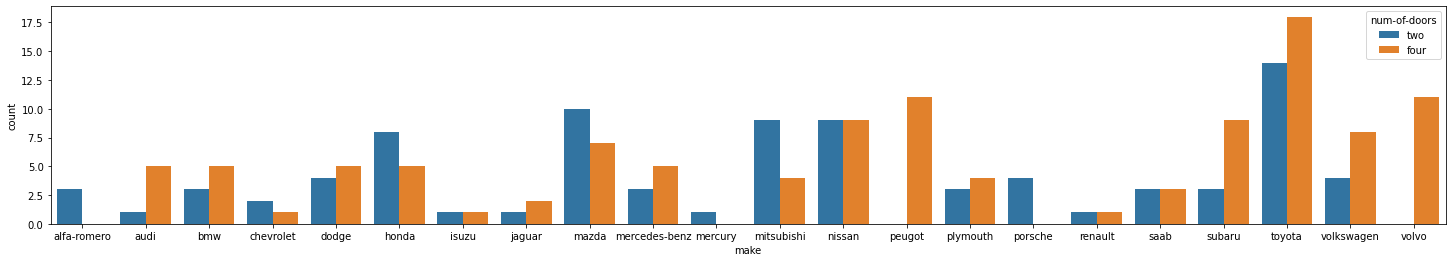

In [ ]:
fig_dims = (25, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x= 'make', data = dataset, ax = ax, hue = 'num-of-doors')

Insight: Only 2-door models are available for alfa-romeo and mercury.
Volvo has only 4-door models

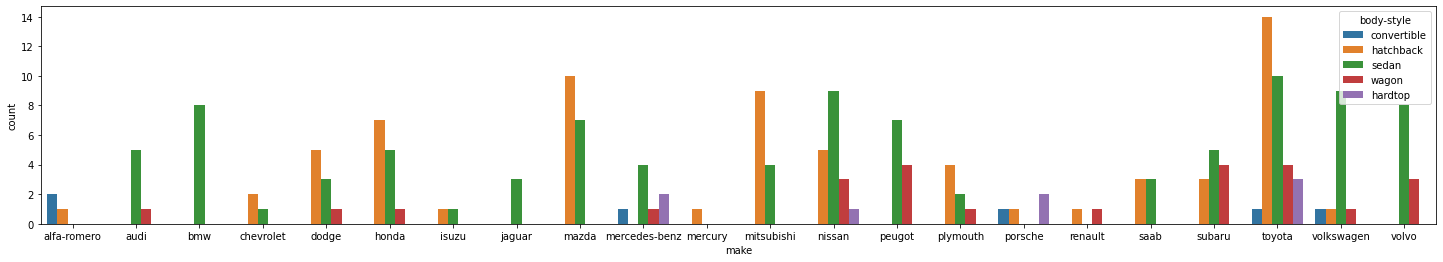

In [ ]:
fig_dims = (25, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x= 'make', data = dataset, ax = ax, hue = 'body-style')

Insight: Toyota has all 5 body styles (convertible, hatchback,sedan, wagon)

BMW has only Sedan body style
SAAB comes in Sedan and Hatchback

Volkswagon has the most sedans and convertible, hatchback and wagon are similar in number

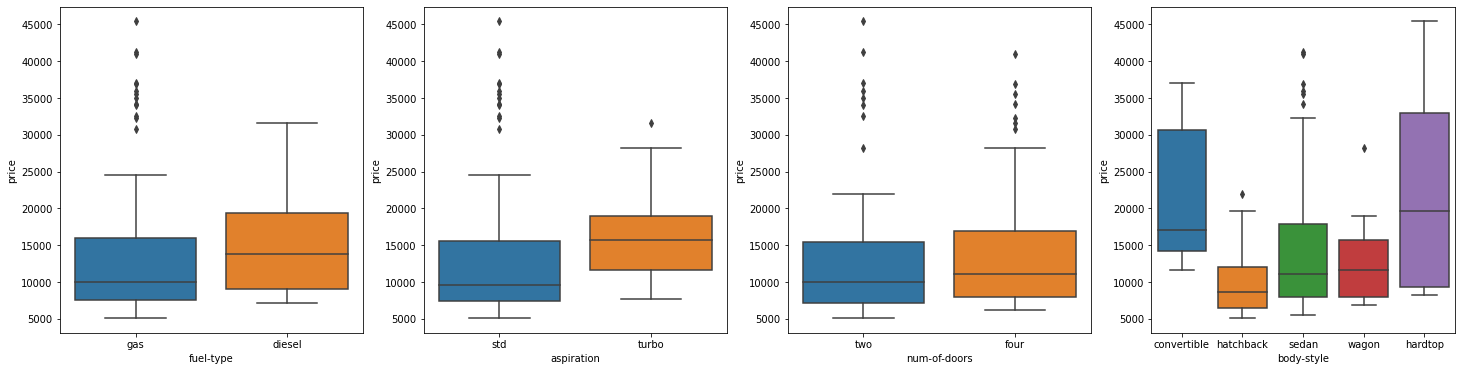

In [ ]:
# Box-Plots
fig_dims = (25, 6)
fig, ax =plt.subplots(1,4, figsize = fig_dims)
sns.boxplot(x='fuel-type', y='price', data=dataset, ax = ax[0])
sns.boxplot(x = 'aspiration', y='price',data = dataset, ax=ax[1])
sns.boxplot(x = 'num-of-doors', y='price',data = dataset, ax=ax[2])
sns.boxplot(x = 'body-style', y='price',data = dataset, ax=ax[3])

50% of the gas fuel-type of vehicles lay in the range of 10000 to 12000

50% of the diesel fuel-type vehicles in the range of 15000 to 16000

50% of std engines are in the range of 10000
50% of turbo engine vehicles are in the range of 16000 to 17000.
50% of convertibles lay in price range of  16000 to 17000

Turbo engine convertibles are the costliest vehicles



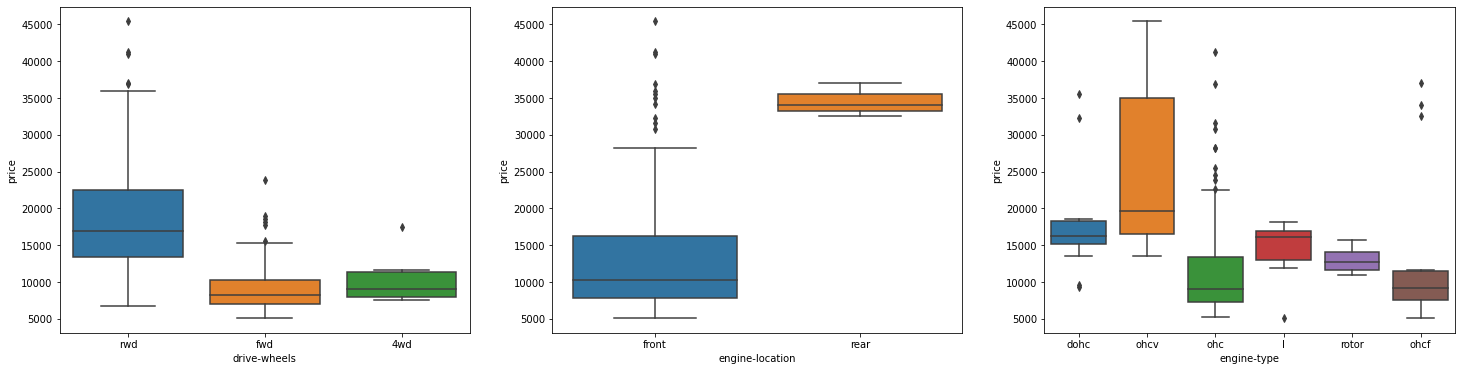

In [ ]:
# Box-Plots
fig_dims = (25, 6)
fig, ax =plt.subplots(1,3, figsize = fig_dims)
sns.boxplot(x = 'drive-wheels', y='price', data = dataset, ax=ax[0])
sns.boxplot(x = 'engine-location', y='price', data = dataset, ax=ax[1])
sns.boxplot(x = 'engine-type', y='price', data = dataset, ax=ax[2])


50% of rwd drive-wheels cost approximately 17000
Vehicles with egine locations at the rare are more expensive than the ones with engine type in the front
Ohcv engine type of vehicles are costlier than other engine types.



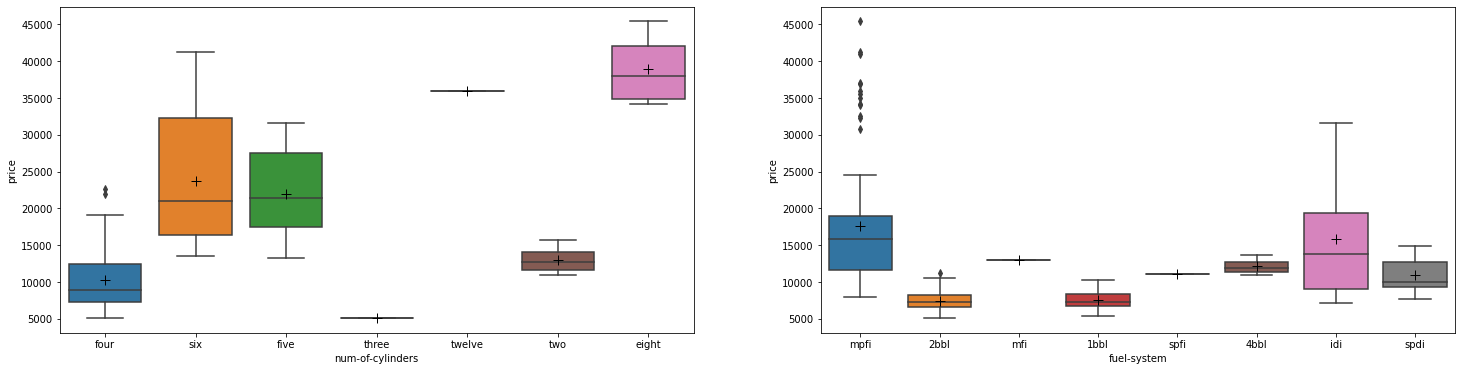

In [ ]:
# Box-Plots
fig_dims = (25, 6)
fig, ax =plt.subplots(1,2, figsize = fig_dims)
sns.boxplot(x = 'num-of-cylinders', y='price', data = dataset, ax=ax[0], showmeans=True, 
            meanprops={"marker": "+", "markeredgecolor": "black", "markersize": "10"})
sns.boxplot(x = 'fuel-system', y='price', data = dataset, ax=ax[1], showmeans=True, 
            meanprops={"marker": "+", "markeredgecolor": "black", "markersize": "10"})

Vehicles with eight  cylinders are the most expensive

Vehicles with 3  cylinders are the least expensive

2bbl fuel system vehicles are least expensive with 50% vehicles having price of 7000.


**CONTINUOUS VARIABLE ANALYSIS**

In [ ]:
dataset.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365602,478.113178,6.423220,6.815150,7947.066342
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5117.587940,24.000000,30.000000,10295.000000
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


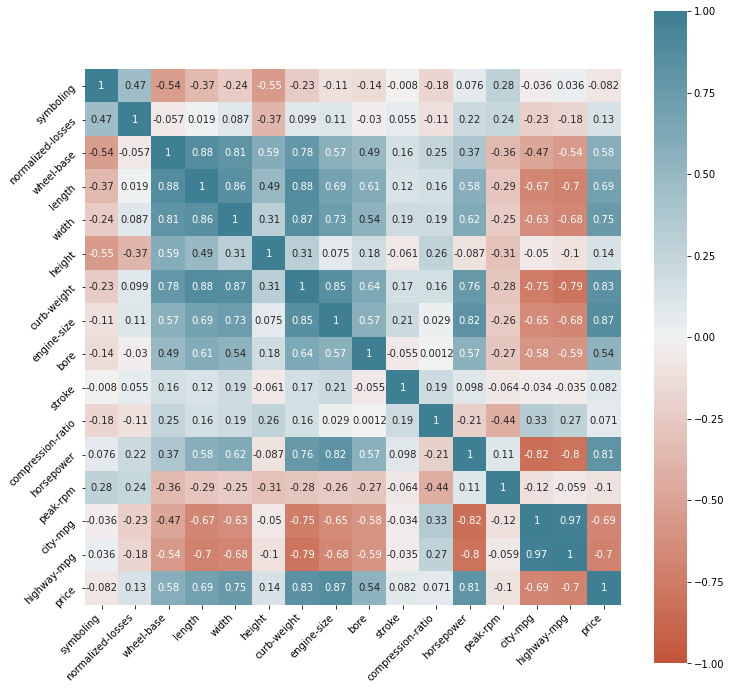

In [ ]:
dataset.corr()
plt.figure(figsize=(12,12))
corr = dataset.corr()
x = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True
)
x.set_xticklabels(
    x.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
x.set_yticklabels(
    x.get_yticklabels(),
    rotation=45,

);

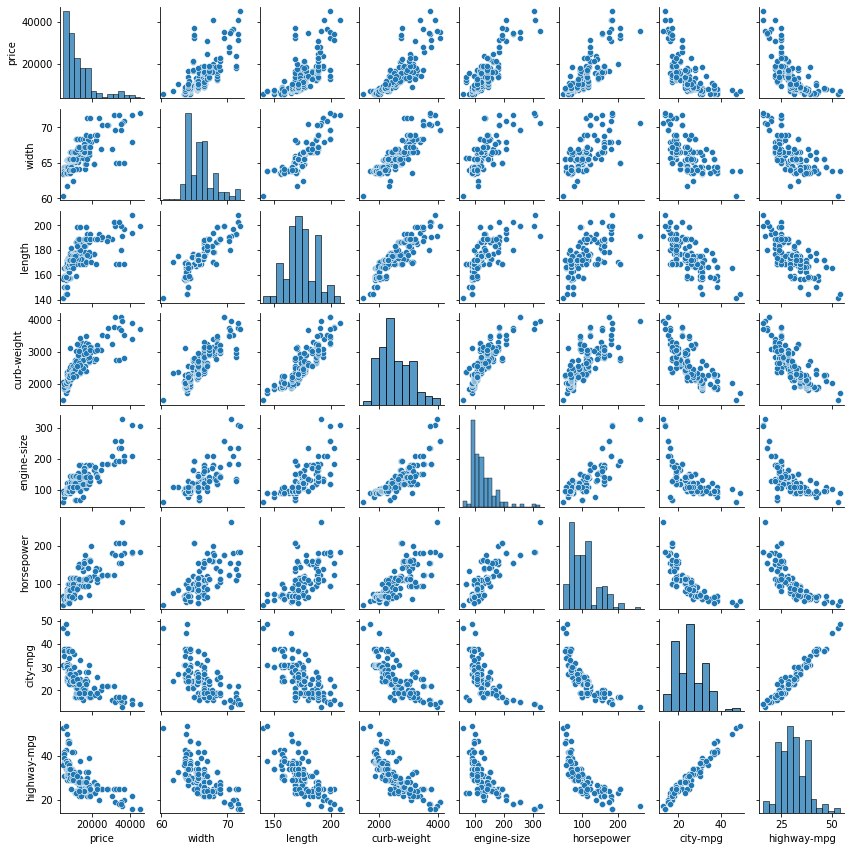

In [ ]:
X = dataset[['price', 'width', 'length', 'curb-weight', 'engine-size', 'horsepower', 'city-mpg', 'highway-mpg']]
sns.pairplot(X, height = 1.5)

Correlation between price and  engine size is very string and it is positively correlated. As the engine size increases, price increases

There is a strong positive correlation between city-mpg and highway mpg. As city mpg increases, highway mpg increases.

There is a negative correlation between city-mpg and price. As the price reduces, city-mpg increases

As the curb weight increases, price increases
As curb weight reduces, highway mpg increases

Lesser the horsepower, greater in the highway mpg
Price increases as highway mpg reduces.

As engine size increases, the horsepower increases.
Greater the horsepower and engine size,greater is the curb size, lower is the higher mpg and city mpg and  greater is the price.
Greater the length of the vehicle, larger is the curb weight and greater the price



